## Report
### Statement of the business task
Analyse the data and identify trends to understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Insights from the analysis will be used to design marketing strategies aimed at converting casual riders into annual members.


### Description of the Data
The data used in the analysis is from previous twelve months i.e., from November 2021 to October 2022. It is downloaded from Divvy Data. Each file was originally compressed in a .zip file format. The .zip files were named according to the month in the year the data was collected. For example, the file containing the data from December 2021 was named “202112-divvy-tripdata.zip. The data has been made available by Motivate International Inc. under this  data license agreement. The data-privacy issues prohibit from using riders’ personally identifiable information.
The data is separated by month, each on its own csv. The population of the dataset is its own clients as bike riders. It has full credibility for the same reason. It is ROCCC because it is reliable, original, comprehensive, current, and cited. All the files have consistent columns and each column has the correct type of data. 
There are over 5 million rows with these columns: 
```
• unique ride ID
• rideable type (member or casual)
• start and end time
• start and end docking station (name and ID)
• start and end latitude/longitude
• bicycle type (classic, docked, electric)
```

### Cleaning or Manipulation of data

In [33]:
# Install required packages
library(tidyverse)  #helps wrangle data
library(lubridate)  #helps wrangle date attributes
library(ggplot2)  #helps visualize data

In [2]:
# STEP 1: COLLECT DATA
q2_2019 <- read.csv("Divvy_Trips_2019_Q2.csv")
q3_2019 <- read.csv("Divvy_Trips_2019_Q3.csv")
q4_2019 <- read.csv("Divvy_Trips_2019_Q4.csv")
q1_2020 <- read.csv("Divvy_Trips_2020_Q1.csv")

In [3]:
# STEP 2: WRANGLE DATA AND COMBINE INTO A SINGLE FILE
# Compare column names each of the files
# While the names don't have to be in the same order, they DO need to match perfectly before we can use a command to join them into one file
colnames(q3_2019)
colnames(q4_2019)
colnames(q2_2019)
colnames(q1_2020)

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "X01...Rental.Details.Rental.ID"                   
 [2] "X01...Rental.Details.Local.Start.Time"            
 [3] "X01...Rental.Details.Local.End.Time"              
 [4] "X01...Rental.Details.Bike.ID"                     
 [5] "X01...Rental.Details.Duration.In.Seconds.Uncapped"
 [6] "X03...Rental.Start.Station.ID"                    
 [7] "X03...Rental.Start.Station.Name"                  
 [8] "X02...Rental.End.Station.ID"                      
 [9] "X02...Rental.End.Station.Name"                    
[10] "User.Type"                                        
[11] "Member.Gender"                                    
[12] "X05...Member.Details.Member.Birthday.Year"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [7]:
# Rename columns to make them consistent with q1_2020 (as this will be the supposed going-forward table design for Divvy)
(q4_2019 <- rename(q4_2019
                   ,ride_id = trip_id
                   ,rideable_type = bikeid 
                   ,started_at = start_time  
                   ,ended_at = end_time  
                   ,start_station_name = from_station_name 
                   ,start_station_id = from_station_id 
                   ,end_station_name = to_station_name 
                   ,end_station_id = to_station_id 
                   ,member_casual = usertype))

(q3_2019 <- rename(q3_2019
                   ,ride_id = trip_id
                   ,rideable_type = bikeid 
                   ,started_at = start_time  
                   ,ended_at = end_time  
                   ,start_station_name = from_station_name 
                   ,start_station_id = from_station_id 
                   ,end_station_name = to_station_name 
                   ,end_station_id = to_station_id 
                   ,member_casual = usertype))

(q2_2019 <- rename(q2_2019
                   ,ride_id = "01 - Rental Details Rental ID"
                   ,rideable_type = "01 - Rental Details Bike ID" 
                   ,started_at = "01 - Rental Details Local Start Time"  
                   ,ended_at = "01 - Rental Details Local End Time"  
                   ,start_station_name = "03 - Rental Start Station Name" 
                   ,start_station_id = "03 - Rental Start Station ID"
                   ,end_station_name = "02 - Rental End Station Name" 
                   ,end_station_id = "02 - Rental End Station ID"
                   ,member_casual = "User Type"))


ride_id,started_at,ended_at,rideable_type,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,gender,birthyear
25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940.0,20,Sheffield Ave & Kingsbury St,309,Leavitt St & Armitage Ave,Subscriber,Male,1987
25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258.0,19,Throop (Loomis) St & Taylor St,241,Morgan St & Polk St,Subscriber,Male,1998
25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850.0,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Female,1991
25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,"2,350.0",313,Lakeview Ave & Fullerton Pkwy,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1990
25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,"1,867.0",210,Ashland Ave & Division St,382,Western Ave & Congress Pkwy,Subscriber,Male,1987
25223645,2019-10-01 00:04:38,2019-10-01 00:10:51,1891,373.0,156,Clark St & Wellington Ave,226,Racine Ave & Belmont Ave,Subscriber,Female,1994
25223646,2019-10-01 00:04:52,2019-10-01 00:22:45,1061,"1,072.0",84,Milwaukee Ave & Grand Ave,142,McClurg Ct & Erie St,Subscriber,Female,1991
25223647,2019-10-01 00:04:57,2019-10-01 00:29:16,1274,"1,458.0",156,Clark St & Wellington Ave,463,Clark St & Berwyn Ave,Subscriber,Male,1995
25223648,2019-10-01 00:05:20,2019-10-01 00:29:18,6011,"1,437.0",156,Clark St & Wellington Ave,463,Clark St & Berwyn Ave,Subscriber,Female,1993
25223649,2019-10-01 00:05:20,2019-10-01 02:23:46,2957,"8,306.0",336,Cottage Grove Ave & 47th St,336,Cottage Grove Ave & 47th St,Customer,,NA


ride_id,started_at,ended_at,rideable_type,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,gender,birthyear
23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992
23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,,NA
23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,,NA
23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,,NA
23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,,NA
23479393,2019-07-01 00:02:21,2019-07-01 00:07:31,4941,310.0,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990
23479394,2019-07-01 00:02:24,2019-07-01 00:23:12,3770,"1,248.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,,NA
23479395,2019-07-01 00:02:26,2019-07-01 00:28:16,5442,"1,550.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,,NA
23479396,2019-07-01 00:02:34,2019-07-01 00:28:57,2957,"1,583.0",43,Michigan Ave & Washington St,195,Columbus Dr & Randolph St,Customer,,NA
23479397,2019-07-01 00:02:45,2019-07-01 00:29:14,6091,"1,589.0",43,Michigan Ave & Washington St,195,Columbus Dr & Randolph St,Customer,,NA


ERROR: Unknown columns `01 - Rental Details Rental ID`, `01 - Rental Details Bike ID`, `01 - Rental Details Local Start Time`, `01 - Rental Details Local End Time`, `03 - Rental Start Station Name` and ... 

In [34]:
# Inspect the dataframes and look for incongruencies
str(q1_2020)
str(q4_2019)
str(q3_2019)
str(q2_2019)


'data.frame':	426887 obs. of  13 variables:
 $ ride_id           : Factor w/ 426887 levels "000054ABAD1C067C",..: 391813 240149 201495 336393 247366 183167 83476 271661 157400 43116 ...
 $ rideable_type     : Factor w/ 1 level "docked_bike": 1 1 1 1 1 1 1 1 1 1 ...
 $ started_at        : Factor w/ 399265 levels "2020-01-01 00:04:44",..: 89046 126625 43584 23366 125179 46802 46949 44870 132970 131198 ...
 $ ended_at          : Factor w/ 399532 levels "2020-01-01 00:10:54",..: 89084 126692 43537 23315 125199 46751 46895 44838 133007 131293 ...
 $ start_station_name: Factor w/ 607 levels "2112 W Peterson Ave",..: 583 130 45 133 143 566 193 193 566 126 ...
 $ start_station_id  : int  239 234 296 51 66 212 96 96 212 38 ...
 $ end_station_name  : Factor w/ 603 levels "","2112 W Peterson Ave",..: 127 497 586 220 562 193 562 562 193 417 ...
 $ end_station_id    : int  326 318 117 24 212 96 212 212 96 100 ...
 $ start_lat         : num  42 42 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.7

In [36]:
# Stack individual quarter's data frames into one big data frame
all_trips <- bind_rows(q2_2019, q3_2019, q4_2019, q1_2020)


Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning mess

In [40]:
# Remove lat, long, birthyear, and gender fields as this data was dropped beginning in 2020
all_trips <- all_trips %>%  
  select(-c(start_lat, start_lng, end_lat, end_lng, birthyear, gender))


In [41]:
# STEP 3: CLEAN UP AND ADD DATA TO PREPARE FOR ANALYSIS
# Inspect the new table that has been created
colnames(all_trips)  #List of column names
nrow(all_trips)  #How many rows are in data frame?
dim(all_trips)  #Dimensions of the data frame?
head(all_trips)  #See the first 6 rows of data frame.  Also tail(all_trips)
str(all_trips)  #See list of columns and data types (numeric, character, etc)
summary(all_trips)  #Statistical summary of data. Mainly for numerics


[1] "X01...Rental.Details.Rental.ID"                   
 [2] "X01...Rental.Details.Local.Start.Time"            
 [3] "X01...Rental.Details.Local.End.Time"              
 [4] "X01...Rental.Details.Bike.ID"                     
 [5] "X01...Rental.Details.Duration.In.Seconds.Uncapped"
 [6] "X03...Rental.Start.Station.ID"                    
 [7] "X03...Rental.Start.Station.Name"                  
 [8] "X02...Rental.End.Station.ID"                      
 [9] "X02...Rental.End.Station.Name"                    
[10] "User.Type"                                        
[11] "Member.Gender"                                    
[12] "X05...Member.Details.Member.Birthday.Year"        
[13] "ride_id"                                          
[14] "started_at"                                       
[15] "ended_at"                                         
[16] "rideable_type"                                    
[17] "tripduration"                                     
[18] "start_station_id"                                 
[19] "start_station_name"                               
[20] "end_station_id"                                   
[21] "end_station_name"                                 
[22] "member_casual"

[1] 3820234

[1] 3820234      22

X01...Rental.Details.Rental.ID,X01...Rental.Details.Local.Start.Time,X01...Rental.Details.Local.End.Time,X01...Rental.Details.Bike.ID,X01...Rental.Details.Duration.In.Seconds.Uncapped,X03...Rental.Start.Station.ID,X03...Rental.Start.Station.Name,X02...Rental.End.Station.ID,X02...Rental.End.Station.Name,User.Type,...,ride_id,started_at,ended_at,rideable_type,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual
22178529,01-04-2019 00:02,01-04-2019 00:09,6251,446,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
22178530,01-04-2019 00:03,01-04-2019 00:20,6226,"1,048.00",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
22178531,01-04-2019 00:11,01-04-2019 00:15,5649,252,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
22178532,01-04-2019 00:13,01-04-2019 00:18,4151,357,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
22178533,01-04-2019 00:19,01-04-2019 00:36,3270,"1,007.00",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
22178534,01-04-2019 00:19,01-04-2019 00:23,3123,257,420,Ellis Ave & 55th St,426,Ellis Ave & 60th St,Subscriber,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


'data.frame':	3820234 obs. of  22 variables:
 $ X01...Rental.Details.Rental.ID                   : int  22178529 22178530 22178531 22178532 22178533 22178534 22178535 22178536 22178537 22178538 ...
 $ X01...Rental.Details.Local.Start.Time            : Factor w/ 101769 levels "01-04-2019 00:02",..: 1 2 3 4 5 5 6 7 8 8 ...
 $ X01...Rental.Details.Local.End.Time              : Factor w/ 102075 levels "01-04-2019 00:09",..: 1 4 2 3 7 5 6 7 10 10 ...
 $ X01...Rental.Details.Bike.ID                     : int  6251 6226 5649 4151 3270 3123 6418 4513 3280 5534 ...
 $ X01...Rental.Details.Duration.In.Seconds.Uncapped: Factor w/ 13378 levels "1,00,333.00",..: 7430 70 4791 6162 12 4796 8744 6255 3603 3585 ...
 $ X03...Rental.Start.Station.ID                    : int  81 317 283 26 202 420 503 260 211 211 ...
 $ X03...Rental.Start.Station.Name                  : Factor w/ 610 levels "2112 W Peterson Ave",..: 166 606 335 373 249 215 204 292 511 511 ...
 $ X02...Rental.End.Station.ID                

 X01...Rental.Details.Rental.ID X01...Rental.Details.Local.Start.Time
 Min.   :22178529               26-06-2019 17:06:     72             
 1st Qu.:22486476               26-06-2019 17:18:     72             
 Median :22796561               10-06-2019 17:32:     68             
 Mean   :22794904               11-06-2019 17:16:     68             
 3rd Qu.:23102076               05-06-2019 17:09:     67             
 Max.   :23410127               (Other)         :1048228             
 NA's   :2771659                NA's            :2771659             
 X01...Rental.Details.Local.End.Time X01...Rental.Details.Bike.ID
 11-06-2019 17:26:     76            Min.   :   1                
 26-06-2019 17:24:     73            1st Qu.:1739                
 26-06-2019 17:38:     73            Median :3478                
 18-06-2019 17:29:     72            Mean   :3401                
 17-04-2019 17:35:     66            3rd Qu.:5086                
 (Other)         :1048215            Max.   

In [42]:
# There are a few problems we will need to fix:
# (1) In the "member_casual" column, there are two names for members ("member" and "Subscriber") and two names for casual riders ("Customer" and "casual"). We will need to consolidate that from four to two labels.
# (2) The data can only be aggregated at the ride-level, which is too granular. We will want to add some additional columns of data -- such as day, month, year -- that provide additional opportunities to aggregate the data.
# (3) We will want to add a calculated field for length of ride since the 2020Q1 data did not have the "tripduration" column. We will add "ride_length" to the entire dataframe for consistency.
# (4) There are some rides where tripduration shows up as negative, including several hundred rides where Divvy took bikes out of circulation for Quality Control reasons. We will want to delete these rides.

# In the "member_casual" column, replace "Subscriber" with "member" and "Customer" with "casual"
# Before 2020, Divvy used different labels for these two types of riders ... we will want to make our dataframe consistent with their current nomenclature
# N.B.: "Level" is a special property of a column that is retained even if a subset does not contain any values from a specific level
# Begin by seeing how many observations fall under each usertype
table(all_trips$member_casual)



    casual   Customer     member Subscriber 
     48480     597888     378407    1746884 

In [44]:
# Reassign to the desired values (we will go with the current 2020 labels)
all_trips <-  all_trips %>% 
  mutate(member_casual = recode(member_casual
                           ,"Subscriber" = "member"
                           ,"Customer" = "casual"))


In [45]:
# Check to make sure the proper number of observations were reassigned
table(all_trips$member_casual)



 casual  member 
 646368 2125291 

In [46]:
# Add columns that list the date, month, day, and year of each ride
# This will allow us to aggregate ride data for each month, day, or year ... before completing these operations we could only aggregate at the ride level
# https://www.statmethods.net/input/dates.html more on date formats in R found at that link
all_trips$date <- as.Date(all_trips$started_at) #The default format is yyyy-mm-dd
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")


In [47]:
# Add a "ride_length" calculation to all_trips (in seconds)
# https://stat.ethz.ch/R-manual/R-devel/library/base/html/difftime.html
all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at)


In [48]:
# Inspect the structure of the columns
str(all_trips)


'data.frame':	3820234 obs. of  28 variables:
 $ X01...Rental.Details.Rental.ID                   : int  22178529 22178530 22178531 22178532 22178533 22178534 22178535 22178536 22178537 22178538 ...
 $ X01...Rental.Details.Local.Start.Time            : Factor w/ 101769 levels "01-04-2019 00:02",..: 1 2 3 4 5 5 6 7 8 8 ...
 $ X01...Rental.Details.Local.End.Time              : Factor w/ 102075 levels "01-04-2019 00:09",..: 1 4 2 3 7 5 6 7 10 10 ...
 $ X01...Rental.Details.Bike.ID                     : int  6251 6226 5649 4151 3270 3123 6418 4513 3280 5534 ...
 $ X01...Rental.Details.Duration.In.Seconds.Uncapped: Factor w/ 13378 levels "1,00,333.00",..: 7430 70 4791 6162 12 4796 8744 6255 3603 3585 ...
 $ X03...Rental.Start.Station.ID                    : int  81 317 283 26 202 420 503 260 211 211 ...
 $ X03...Rental.Start.Station.Name                  : Factor w/ 610 levels "2112 W Peterson Ave",..: 166 606 335 373 249 215 204 292 511 511 ...
 $ X02...Rental.End.Station.ID                

In [49]:
# Convert "ride_length" from Factor to numeric so we can run calculations on the data
is.factor(all_trips$ride_length)
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))
is.numeric(all_trips$ride_length)


[1] FALSE

[1] TRUE

In [50]:
# Remove "bad" data
# The dataframe includes a few hundred entries when bikes were taken out of docks and checked for quality by Divvy or ride_length was negative
# We will create a new version of the dataframe (v2) since data is being removed
# https://www.datasciencemadesimple.com/delete-or-drop-rows-in-r-with-conditions-2/
all_trips_v2 <- all_trips[!(all_trips$start_station_name == "HQ QR" | all_trips$ride_length<0),]


In [53]:
# STEP 4: CONDUCT DESCRIPTIVE ANALYSIS
# Descriptive analysis on ride_length (all figures in seconds)
mean(all_trips_v2$ride_length) #straight average (total ride length / rides)
median(all_trips_v2$ride_length) #midpoint number in the ascending array of ride lengths
max(all_trips_v2$ride_length) #longest ride
min(all_trips_v2$ride_length) #shortest ride


[1] NA

[1] NA

[1] NA

[1] NA

In [54]:
# You can condense the four lines above to one line using summary() on the specific attribute
summary(all_trips_v2$ride_length)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1     406     701    1540    1265 9387024 1048575 

In [55]:
# Compare members and casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = median)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = max)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = min)


all_trips_v2$member_casual,all_trips_v2$ride_length
casual,3812.0090
member,852.9544


all_trips_v2$member_casual,all_trips_v2$ride_length
casual,1505
member,583


all_trips_v2$member_casual,all_trips_v2$ride_length
casual,9387024
member,9056634


all_trips_v2$member_casual,all_trips_v2$ride_length
casual,2
member,1


In [56]:
# See the average ride time by each day for members vs casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)


all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
casual,Friday,4170.0055
member,Friday,823.7175
casual,Monday,3632.0641
member,Monday,843.2026
casual,Saturday,3460.4535
member,Saturday,991.1996
casual,Sunday,3871.9759
member,Sunday,910.9079
casual,Thursday,3928.9726
member,Thursday,824.2099


In [57]:
# Notice that the days of the week are out of order. Let's fix that.
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))


In [58]:
# Now, let's run the average ride time by each day for members vs casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)


all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
casual,Sunday,3871.9759
member,Sunday,910.9079
casual,Monday,3632.0641
member,Monday,843.2026
casual,Tuesday,3872.3017
member,Tuesday,837.5502
casual,Wednesday,4007.4516
member,Wednesday,822.4819
casual,Thursday,3928.9726
member,Thursday,824.2099


In [59]:
# analyze ridership data by type and weekday
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%  #creates weekday field using wday()
  group_by(member_casual, weekday) %>%  #groups by usertype and weekday
  summarise(number_of_rides = n()							#calculates the number of rides and average duration 
  ,average_duration = mean(ride_length)) %>% 		# calculates the average duration
  arrange(member_casual, weekday)		

Warning message:
"Factor `weekday` contains implicit NA, consider using `forcats::fct_explicit_na`"

member_casual,weekday,number_of_rides,average_duration
casual,Sun,125961,3871.9759
casual,Mon,75719,3632.0641
casual,Tue,64944,3872.3017
casual,Wed,67556,4007.4516
casual,Thu,77908,3928.9726
casual,Fri,85796,4170.0055
casual,Sat,144712,3460.4535
member,Sun,192315,910.9079
member,Mon,343330,843.2026
member,Tue,368924,837.5502


Warning message:
"Factor `weekday` contains implicit NA, consider using `forcats::fct_explicit_na`"

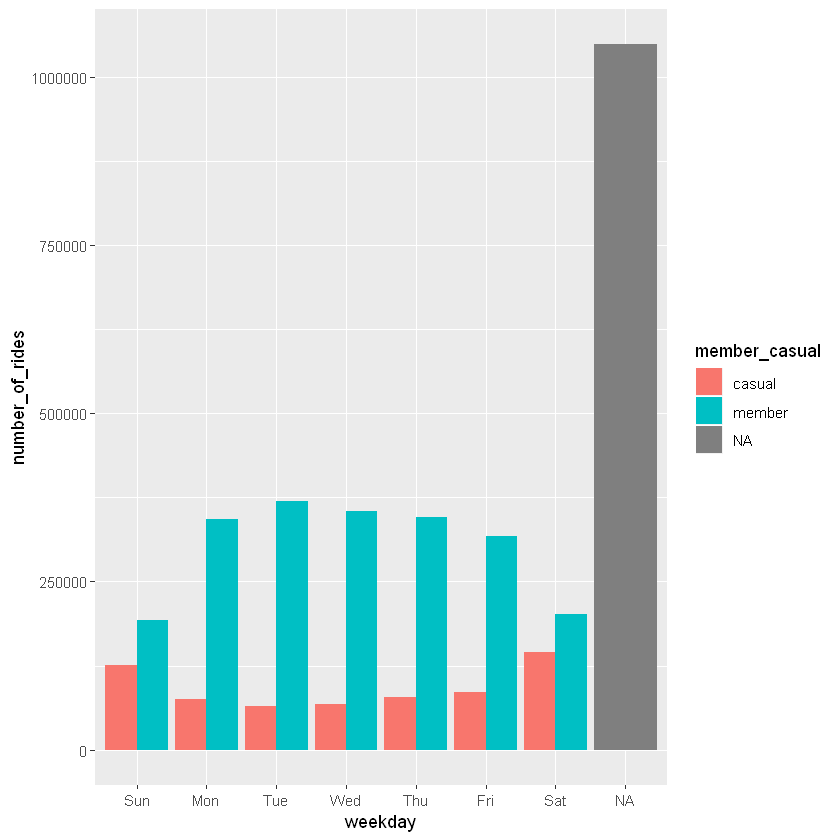

In [60]:
# Let's visualize the number of rides by rider type
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")


Warning message:
"Factor `weekday` contains implicit NA, consider using `forcats::fct_explicit_na`"Warning message:
"Removed 1 rows containing missing values (geom_col)."

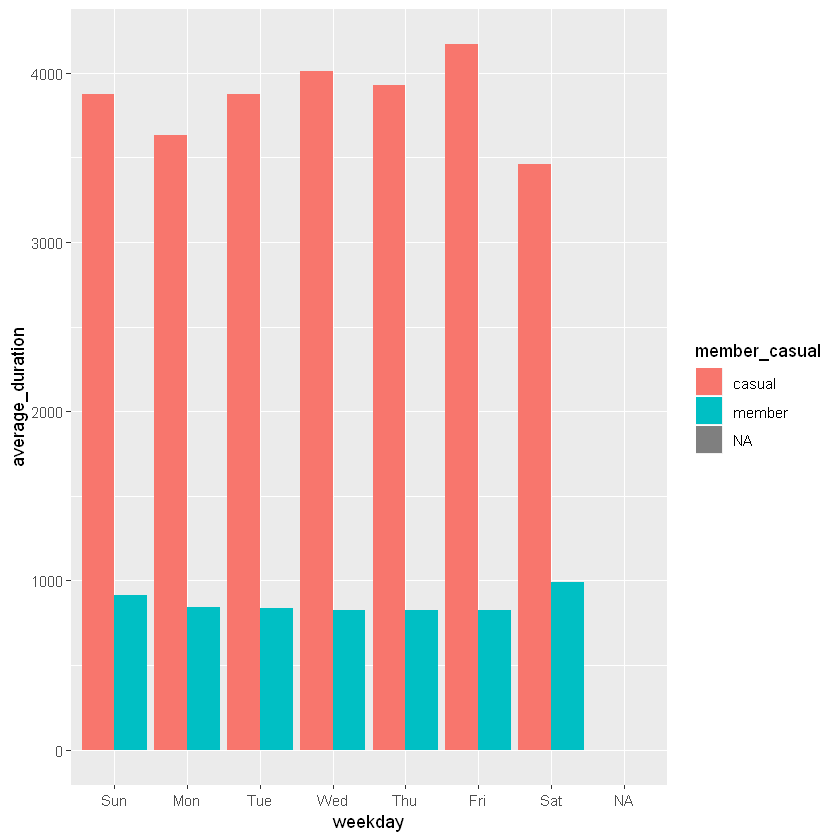

In [61]:
# Let's create a visualization for average duration
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")


In [64]:
# STEP 5: EXPORT SUMMARY FILE FOR FURTHER ANALYSIS
counts <- aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)
write.csv(counts, file = 'C:/Users/HP/Desktop/Dvtrip/avg_ride_length.csv')
